AIN212_Project

Name-Surname: Demir Emiroğlu

Number: 2240765048

Dataset_link: https://www.kaggle.com/datasets/waqi786/climate-change-impact-on-agriculture

##NOTE: I wrote desired comments under each step and bring them together as a single text(report) at the end of the notebook. I did this because I              wasn't sure whether the comments should be seperated under each step or together as a single text at the end.

In [359]:
# Necessary imports:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [346]:
#STEP2:

df=pd.read_csv("https://drive.google.com/uc?id=1z4fe48leXXSQgAK0HEOt4p3ChTkYtfXP")


quantitative_v=["Year","Average_Temperature_C","Total_Precipitation_mm","CO2_Emissions_MT","Extreme_Weather_Events", "Irrigation_Access_%","Pesticide_Use_KG_per_HA","Fertilizer_Use_KG_per_HA","Soil_Health_Index","Economic_Impact_Million_USD"] 

######Checking for missing values
print(df.isnull().sum())

######Encoding categorical variables:
df_encode=df.copy()
df_encode=pd.get_dummies(df_encode,columns=qualitative_v,drop_first=True) 

######Standardizing/Scaling numerical variables:
scaler = StandardScaler()
df_encode[quantitative_v] = scaler.fit_transform(df_encode[quantitative_v])

print("\n")
print("""In this step, I did 3 things for data preprocessing:
1.) I checked if there are missing values in the dataset. There are no missing values so there is no need to impute values. If there were missing values;
I would do mean or median imputation for numerical variables, mode imputation for categorical variables. Imputation is better than leaving empty because
most algorithms can't handle missing values, they need full datasets. Also in this way we can hadle the loss of data a bit.
2.) I did encoding for categorical variables. Since categorical variables are not 'numerical values' they can't be percieved like one is greater or less
than the other. Thats why we need convert categorical variables into discrete values to use them in upcoming classification and clustering tasks.
3.) I did standardizing/scaling. Assume that values of one column vary from 10 to 100 while values of another column vary from 10 to 10000. In this case
values of the second column will dominate the values of first column. Values of first column are almost 'ignored' in this situation. Scaling prevents 
this situation. If we didn't scale the data, results of later calculations like Euclidean distance in KMeans will not be true and logical because of the
domination.""")

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64


In this step, I did 3 things for data preprocessing:
1.) I checked if there are missing values in the dataset. There are no missing values so there is no need to impute values. If there were missing values;
I would do mean or median imputation for numerical variables, mode imputation for categorical variables. Imputation is better than leaving empty because
most algorithms can't handle missing values, they need full datasets. Also in this way we can hadle the loss of data a bit.
2.) I 

In [348]:
#STEP3 first part:

###### Descriptive statistics of preprocessed data:
print("Dataset shape:", df_encode.shape,"\n")
df_encode[quantitative_v].describe().round(2)

Dataset shape: (10000, 66) 



,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.69,-1.76,-1.75,-1.72,-1.57,-1.74,-1.72,-1.74,-1.73,-1.51
25%,-0.80,-0.86,-0.85,-0.87,-0.94,-0.87,-0.86,-0.86,-0.87,-0.78
50%,-0.01,-0.01,-0.00,-0.01,0.01,-0.00,-0.00,-0.01,-0.01,-0.22
75%,0.88,0.88,0.86,0.88,0.95,0.86,0.86,0.87,0.87,0.59
max,1.68,1.72,1.72,1.72,1.59,1.72,1.73,1.74,1.74,4.03


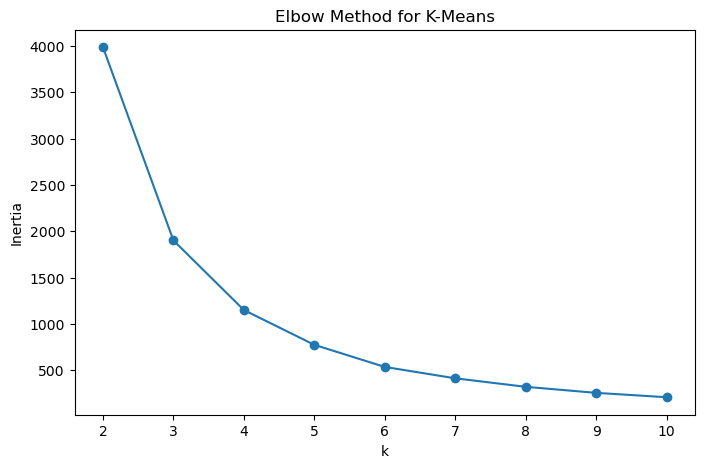


Silhouette scores for different k values:
Score for k=2 is 0.5704
Score for k=3 is 0.5586
Score for k=4 is 0.5383
Score for k=5 is 0.5262
Score for k=6 is 0.5353
Score for k=7 is 0.5202
Score for k=8 is 0.5236
Score for k=9 is 0.5216
Score for k=10 is 0.5238


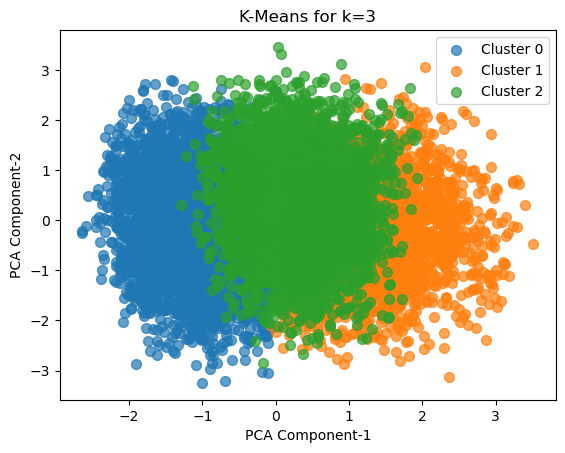



In this step,
Firstly I decided which k value to chose for KMeans clustering. For this, i used 2 methods. The first one is Elbow Method. In the graph there is a sharp
fall from k=2 to k=3 while there is a less sharp fall from k=3 to k=4. This means that k=3 is the 'elbow point' which means KMeans clustering gave best
results when k is 3. The second method I used is calculating silhouette scores for different k values. A larger silhouette score means data points
really belong to their clusters, in other words data points are better clustered. When we look at the results, k=3 is the second highest value (it has a
score of 0.5586) which proves that the result of elbow point is true and logical. K=2 has a higher silhouette score but since the difference is so small
(less than 0.02) we can neglect it. So we chose k=3 to apply KMeans. When we look at KMeans clustering graph, some data points are so close to each other 
and some of them overlap. This is probably because the dataset is so la

In [350]:

#STEP3 second part:

df_clustered = df_encode.copy()
X_cluster = df_clustered.drop(columns=[target])
pca = PCA(n_components=1, random_state=42)
X_pca = pca.fit_transform(X_cluster)

######Choosing the 'optimal' k value for clustering:
#-Elbow plot:
inertia = []
K = range(2, 11) 
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_) 
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

#-Silhouette scores:
silhouette_scores = []
print("\nSilhouette scores for different k values:")
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    s_score = silhouette_score(X_pca, labels)
    silhouette_scores.append(s_score)
    print(f"Score for k={k} is {s_score:.4f}")

######Applying KMeans Clustering:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clustered['cluster'] = kmeans.fit_predict(X_cluster)
pca = PCA(n_components=2, random_state=42)
predictor_pca = pca.fit_transform(X_cluster)
plt.figure()
for cluster in range(3):
    plt.scatter(
        predictor_pca[df_clustered['cluster'] == cluster, 0],
        predictor_pca[df_clustered['cluster'] == cluster, 1],
        label=f'Cluster {cluster}',
        s=50,
        alpha=0.7)
plt.xlabel("PCA Component-1")
plt.ylabel("PCA Component-2")
plt.title("K-Means for k=3")
plt.legend()
plt.show()

print("\n")
print("""In this step,
Firstly I decided which k value to chose for KMeans clustering. For this, i used 2 methods. The first one is Elbow Method. In the graph there is a sharp
fall from k=2 to k=3 while there is a less sharp fall from k=3 to k=4. This means that k=3 is the 'elbow point' which means KMeans clustering gave best
results when k is 3. The second method I used is calculating silhouette scores for different k values. A larger silhouette score means data points
really belong to their clusters, in other words data points are better clustered. When we look at the results, k=3 is the second highest value (it has a
score of 0.5586) which proves that the result of elbow point is true and logical. K=2 has a higher silhouette score but since the difference is so small
(less than 0.02) we can neglect it. So we chose k=3 to apply KMeans. When we look at KMeans clustering graph, some data points are so close to each other 
and some of them overlap. This is probably because the dataset is so large, complicated and values are close to each other. We can also understand this
by looking at the silhouette score. Silhouette score is in the middle of 0 and 1 which means clusters neither strictly well seperated nor strictly 
overlapped.""")

In [352]:
#STEP4:

#### Defining target variable and feature variables, also binarizing target variable for classification:
df_classification=df_encode.copy()
target="Crop_Yield_MT_per_HA"
df_classification["Yield_Class"]=(df_classification[target]>=df_classification[target].median()).astype(int)
y=df_classification["Yield_Class"]
x=df_classification.drop(columns=[target, "Yield_Class"])

#### Creating 70% train set, 15% test set and %15 validation set:
X_train_val, X_test, y_train_val, y_test = train_test_split(x,y,test_size=0.15,random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.1765,random_state=42,stratify=y_train_val)

#### Standardizing train, test and validation sets of features:
scaler_classification=StandardScaler()
X_train[quantitative_v] = scaler_classification.fit_transform(X_train[quantitative_v])
X_val[quantitative_v] = scaler_classification.transform(X_val[quantitative_v])
X_test[quantitative_v] = scaler_classification.transform(X_test[quantitative_v])

#### First classification algorithm: Logistic Regression
logistic_regression=LogisticRegression(max_iter=1000,random_state=42)
logistic_regression.fit(X_train,y_train)
logistic_regression_prediction=logistic_regression.predict(X_val)

#### Second classification algorithm: K-Nearest-Neighbors
k_nearest_neighbors=KNeighborsClassifier(n_neighbors=5)
k_nearest_neighbors.fit(X_train,y_train)
k_nearest_neighbors_prediction=k_nearest_neighbors.predict(X_val)

#### Third classification algorithm: Decision Tree
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train,y_train)
decision_tree_prediction=decision_tree.predict(X_val)

print("""In this step,
Firstly I chose my target variable which is 'Crop_Yield_MT_per_HA'. I chose this variable as target because my dataset is about the impact of climate 
change on agriculture, and this column gives information about the crop yield through different climate parameters. Then I binarized the target variable
because in the class we worked on classificaion algorithms over binary data. For binarizing I took 'median'as referance because I thinked it like a 
treshold value of 0.5 which is the most used treshold value in such algorithms. Then I setup 70% train, 15% test and 15% validation sets. I chosed:
-Logistic Regression because it is compatible with binary classification and a linear model.
-KNN because it is compatible with binary classification and a non-linear model.
-Decision Tree because it is suitable with binary classification and a more practical model, I mean people can also create it by hand up to a level.
Another reason is we saw these three in the class but on the other hand they are different types of models(linear,non-linear,more practical). I will
comment on comparison of their results in the next step because in the homework file results are calculated under step 5.""")


In this step,
Firstly I chose my target variable which is 'Crop_Yield_MT_per_HA'. I chose this variable as target because my dataset is about the impact of climate 
change on agriculture, and this column gives information about the crop yield through different climate parameters. Then I binarized the target variable
because in the class we worked on classificaion algorithms over binary data. For binarizing I took 'median'as referance because I thinked it like a 
treshold value of 0.5 which is the most used treshold value in such algorithms. Then I setup 70% train, 15% test and 15% validation sets. I chosed:
-Logistic Regression because it is compatible with binary classification and a linear model.
-KNN because it is compatible with binary classification and a non-linear model.
-Decision Tree because it is suitable with binary classification and a more practical model, I mean people can also create it by hand up to a level.
Another reason is we saw these three in the class but on the o

### ALGORITHM-1: LOGISTIC REGRESSION ###



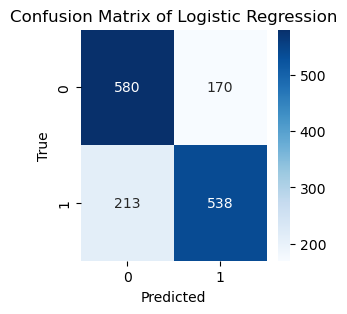


Metrics of Logistic Regression:
 Accuracy: 0.7448367754830113
 Precision: 0.7598870056497176
 Recall: 0.7163781624500666
 F1-score: 0.7374914324880055




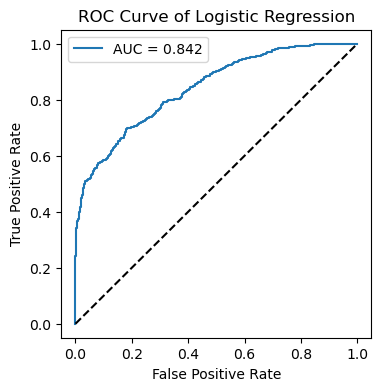

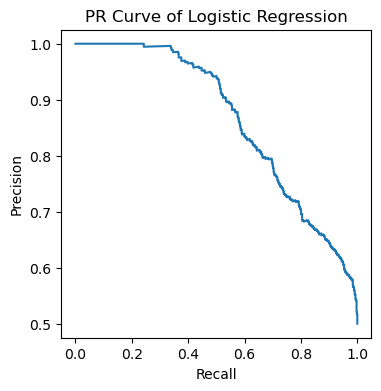



### ALGORITHM-2: K-NEAREST NEIGHBORS ###



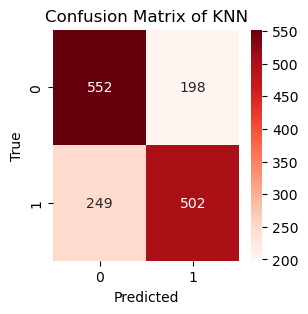


Metrics of KNN:
 Accuracy: 0.7021985343104596
 Precision: 0.7171428571428572
 Recall: 0.6684420772303595
 F1-score: 0.6919365954514128




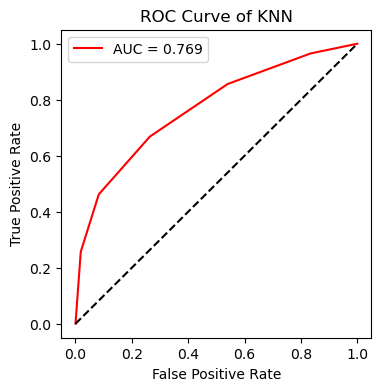

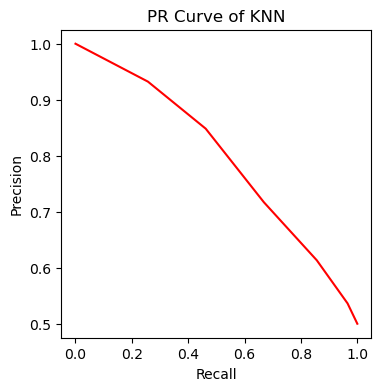



### ALGORITHM-3: DECISION TREE ###



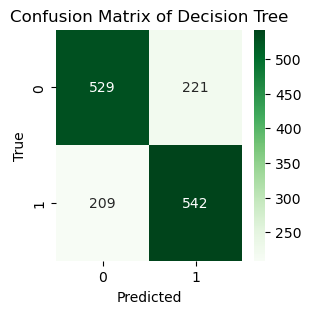


Metrics of Decision Tree:
 Accuracy: 0.7135243171219188
 Precision: 0.7103538663171691
 Recall: 0.7217043941411452
 F1-score: 0.7159841479524439




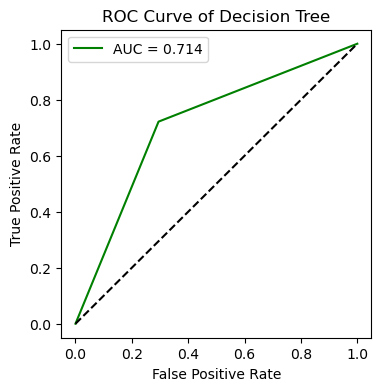

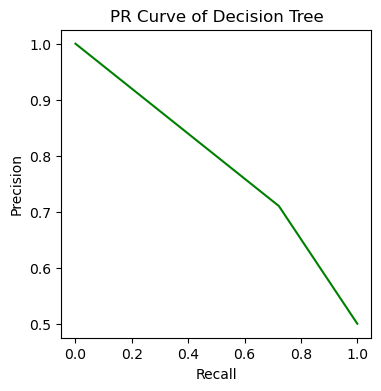




Between 3 classification algorithms the best working one is Logistic Regression (from best to worse: Logistic Regression, KNN, Decision Tree).
I will explain why I chose Logistic Regression through commenting on results of ROC curve, PR curve and Confusion Matrix respectively:
1.) ROC curve: While the area under the graph of a perfect predictor is 1, area under graph of a random predictor is 0.5 . This means an area closer to
1 indicates a better model. AUC of Logistic Regression is the highest, with a value of 0.842 which is super high, among three classification algorithms.
Also by only looking at graphs, we can see that the graph of Logistic Regression is the most similar to the graph of perfect predictor. The curve is 
quite close to the left and up sides if you imagine the graph of a perfect predictor.
2.) PR curve: We can comment on the area under PR curve. A larger area indicates a better model because this means that it performs better in correctly
labeling positive samples 

In [356]:
#STEP5:

#### Calculation and visualizations for Logistic Regression:
print("### ALGORITHM-1: LOGISTIC REGRESSION ###\n")
# Confusion Matrix
confusion_matrix_logistic_regression = confusion_matrix(y_val,logistic_regression_prediction)
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix_logistic_regression, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

tn, fp, fn, tp = confusion_matrix_logistic_regression.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("\nMetrics of Logistic Regression:")
print(" Accuracy:", accuracy)
print(" Precision:", precision)
print(" Recall:", recall)
print(" F1-score:", f1)
print("\n")

#ROC Curve
probability_logistic_regression=logistic_regression.predict_proba(X_val)[:, 1]

fpr_lr,tpr_lr,_=roc_curve(y_val,probability_logistic_regression)
AUC_logistic_regression=auc(fpr_lr,tpr_lr)
plt.figure(figsize=(4,4))
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {AUC_logistic_regression:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Logistic Regression")
plt.legend()
plt.show()

# Precision-Recall Curve
precision_lr, recall_lr, _=precision_recall_curve(y_val,probability_logistic_regression)
plt.figure(figsize=(4,4))
plt.plot(recall_lr, precision_lr)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve of Logistic Regression")
plt.show()


#### Calculation and visualizations for K-Nearest Neighbors:
print("\n\n### ALGORITHM-2: K-NEAREST NEIGHBORS ###\n")
# Confusion Matrix
confusion_matrix_knn = confusion_matrix(y_val, k_nearest_neighbors_prediction)
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of KNN")
plt.show()

tn, fp, fn, tp = confusion_matrix_knn.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("\nMetrics of KNN:")
print(" Accuracy:", accuracy)
print(" Precision:", precision)
print(" Recall:", recall)
print(" F1-score:", f1)
print("\n")

# ROC Curve
probability_knn = k_nearest_neighbors.predict_proba(X_val)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_val, probability_knn)
AUC_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(4,4))
plt.plot(fpr_knn, tpr_knn,color="red",label=f"AUC = {AUC_knn:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of KNN")
plt.legend()
plt.show()

# Precision-Recall Curve
precision_knn, recall_knn, _ = precision_recall_curve(y_val, probability_knn)
plt.figure(figsize=(4,4))
plt.plot(recall_knn, precision_knn,color="red")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve of KNN")
plt.show()


#### Calculation and visualizations for Decision Tree:
print("\n\n### ALGORITHM-3: DECISION TREE ###\n")
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(y_val, decision_tree_prediction)
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix_decision_tree, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Decision Tree")
plt.show()

tn, fp, fn, tp = confusion_matrix_decision_tree.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("\nMetrics of Decision Tree:")
print(" Accuracy:", accuracy)
print(" Precision:", precision)
print(" Recall:", recall)
print(" F1-score:", f1)
print("\n")

# ROC Curve
probability_decision_tree = decision_tree.predict_proba(X_val)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_val, probability_decision_tree)
AUC_decision_tree = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(4,4))
plt.plot(fpr_dt, tpr_dt,color="green",label=f"AUC = {AUC_decision_tree:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Decision Tree")
plt.legend()
plt.show()

# Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_val, probability_decision_tree)
plt.figure(figsize=(4,4))
plt.plot(recall_dt, precision_dt,color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve of Decision Tree")
plt.show()

print("\n\n")
print("""Between 3 classification algorithms the best working one is Logistic Regression (from best to worse: Logistic Regression, KNN, Decision Tree).
I will explain why I chose Logistic Regression through commenting on results of ROC curve, PR curve and Confusion Matrix respectively:
1.) ROC curve: While the area under the graph of a perfect predictor is 1, area under graph of a random predictor is 0.5 . This means an area closer to
1 indicates a better model. AUC of Logistic Regression is the highest, with a value of 0.842 which is super high, among three classification algorithms.
Also by only looking at graphs, we can see that the graph of Logistic Regression is the most similar to the graph of perfect predictor. The curve is 
quite close to the left and up sides if you imagine the graph of a perfect predictor.
2.) PR curve: We can comment on the area under PR curve. A larger area indicates a better model because this means that it performs better in correctly
labeling positive samples while identifying a large proportion of them. Logistic Regression has the highest area under the graph among three 
classification models. 
3.) Confusion matrix: Confusion matrix has 4 metrics in it. Accuracy gives us information about how many predictions are correct so we can have an idea
about the overal success of the model. Logistic Regression has the highest accuracy. By only looking at precision and recall we can't strictly say that
one is better or worse than other. Actually the ballance between them is more important. F1-score is the balance between them. A higher F1-score means
the model catches more positives(high recall) and avoids more false positives(high precision). Logistic Regression has the highest F1-score which makes
it a better model again. Lastly we can also calculate the error rate by subtracting accuracy from 1. Logistic Regression has the least error rate which 
means the model tends to make less incorrect predictions.""")
